In [1]:
from keras.models import load_model
import random
import matplotlib.pyplot as plt

/home/mctrjalloh/.virtualenvs/ml/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%store -r X_train
%store -r Y_train

In [3]:
%store -r X_test
%store -r Y_test

In [4]:
X_train.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.354839,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.354839,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0


In [5]:
model = load_model('../logs/models/ids-model9977.h5')

In [6]:
model.evaluate(x=X_test, y=Y_test)

10000/10000 [==============================] - 1s 78us/step


[0.24992957883278405, 0.9808]

# Population

In [7]:
%store -r properties

In [8]:
properties = properties[:-1] # Don't include the output
properties

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [9]:
# # Can we sample the data with randomly ordered columns
# X_train[['count', 'service']].head()

Random sampling the set of properties to get any subset of it

In [10]:
def random_subset(the_set=properties, size=random.randint(1, len(properties))):
    individual = random.sample(properties, k=size)
    return individual
subset = random_subset()
print(subset)
print(len(subset))

['dst_host_same_srv_rate', 'num_access_files', 'num_file_creations', 'dst_host_diff_srv_rate', 'duration', 'num_outbound_cmds', 'dst_host_serror_rate', 'dst_bytes', 'dst_host_srv_rerror_rate', 'srv_serror_rate', 'num_root', 'num_failed_logins', 'is_host_login', 'num_shells', 'dst_host_srv_count', 'service', 'same_srv_rate', 'hot', 'protocol_type', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'land', 'num_compromised', 'srv_diff_host_rate']
24


In [11]:
from deap import base, creator
import random
from deap import tools

In [12]:
# CREATE TYPES
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [13]:
from deap.tools import initIterate
initIterate(list, random_subset)

['land',
 'srv_count',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_rerror_rate',
 'rerror_rate',
 'num_compromised',
 'root_shell',
 'num_outbound_cmds',
 'srv_serror_rate',
 'dst_host_diff_srv_rate',
 'urgent',
 'dst_host_same_src_port_rate',
 'num_root',
 'dst_host_count',
 'dst_host_srv_serror_rate',
 'dst_bytes',
 'serror_rate',
 'num_file_creations',
 'dst_host_serror_rate',
 'hot',
 'duration',
 'num_shells',
 'num_access_files']

In [14]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import Sequential


In [15]:
# CREATE TYPES
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/home/mctrjalloh/.virtualenvs/ml/lib/python3.5/site-packages/deap-1.2.2-py3.5-linux-x86_64.egg/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/mctrjalloh/.virtualenvs/ml/lib/python3.5/site-packages/deap-1.2.2-py3.5-linux-x86_64.egg/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [16]:
# FITNESS OPERATOR

individual = random_subset()
# print(individual)

def evaluate(individual):
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(len(individual),)))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("    Individual Evaluation... length: ", len(individual))
    model.fit(x=X_train[individual], y=Y_train, epochs=10, batch_size=256, verbose=0)
    val = model.evaluate(x=X_test[individual], y=Y_test)[1]
    print(val)
    return val,

# evaluate(individual)

In [17]:
# MUTATION OPERATOR
def mutate(individual, union_difference_prob=.5): # We will use union or difference 50% of the time
    print("Individual Mutation: ")                                                 # this helps considering small and large subsets equivalently
    mutator = random_subset(size=5)
#     print('mutator: ', mutator, '\n', len(mutator))
    mutated = []
    if random.random() < union_difference_prob:
        mutated = list(set(individual).union(set(mutator)))
    else:
        mutated = list(set(individual).difference(set(mutator)))
    return mutated
# # s1 = {2, 3, 4}
# # s2 = {3, 4, 5}
# # print(s1.union(s2))
# mutee = random_subset(size=random.randint(1, 41))
# print('mutee: ', ind, '\n', len(mutee))
# result = mutate(mutee)
# print('result:' , result, '\n', len(result))
# # random_subset(size=int(len(properties)/2))


GENERATION  0 

    Population:  [36, 32, 7, 30, 23, 40, 28, 32, 5, 24, 28, 28, 2, 34, 23, 5, 18, 8, 16, 24, 8, 9, 39, 33, 25, 4, 14, 27, 33, 36, 17, 22, 17, 27, 14, 33, 5, 35, 24, 22, 8]
    Individual Evaluation... length:  36
10000/10000 [==============================] - 1s 58us/step
0.9802
    Individual Evaluation... length:  32
10000/10000 [==============================] - 1s 59us/step
0.9801
    Individual Evaluation... length:  7
10000/10000 [==============================] - 1s 69us/step
0.1208
    Individual Evaluation... length:  30
10000/10000 [==============================] - 0s 49us/step
0.973
    Individual Evaluation... length:  23
10000/10000 [==============================] - 0s 50us/step
0.9793
    Individual Evaluation... length:  40
10000/10000 [==============================] - 1s 51us/step
0.9791
    Individual Evaluation... length:  28
10000/10000 [==============================] - 1s 52us/step
0.9788
    Individual Evaluation... length:  32
10000/10000 [===

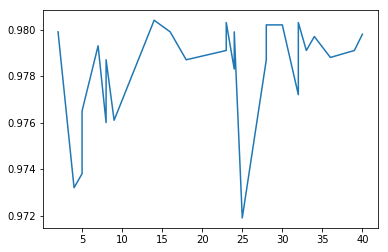


GENERATION  1 

    Population:  [33, 24, 23, 22, 8, 30, 36, 30, 24, 14, 8, 22, 25, 36, 28, 25, 34, 24, 33, 33, 33, 40, 28, 33, 4, 28, 22, 23, 36, 33, 4, 4, 32, 23, 32, 27, 33, 32, 22, 14, 22]
    Individual Evaluation... length:  33
10000/10000 [==============================] - 2s 193us/step
0.9799
    Individual Evaluation... length:  24
10000/10000 [==============================] - 2s 197us/step
0.9802
    Individual Evaluation... length:  23
10000/10000 [==============================] - 2s 197us/step
0.9798
    Individual Evaluation... length:  22
10000/10000 [==============================] - 2s 202us/step
0.9801
    Individual Evaluation... length:  8
10000/10000 [==============================] - 2s 204us/step
0.9799
    Individual Evaluation... length:  30
10000/10000 [==============================] - 2s 207us/step
0.9734
    Individual Evaluation... length:  36
10000/10000 [==============================] - 2s 208us/step
0.9803
    Individual Evaluation... length:  30
100

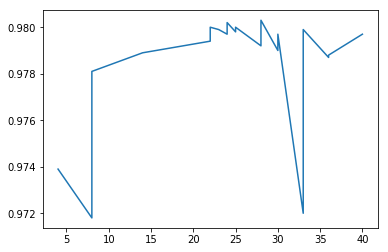


GENERATION  2 

    Population:  [40, 33, 22, 23, 22, 36, 36, 36, 33, 36, 22, 22, 22, 32, 27, 40, 25, 40, 33, 22, 36, 32, 14, 22, 8, 14, 32, 8, 24, 22, 14, 36, 22, 22, 36, 25, 40, 36, 32, 14, 36]
    Individual Evaluation... length:  40
10000/10000 [==============================] - 4s 352us/step
0.9717
    Individual Evaluation... length:  33
10000/10000 [==============================] - 4s 355us/step
0.9804
    Individual Evaluation... length:  22
10000/10000 [==============================] - 4s 357us/step
0.9784
    Individual Evaluation... length:  23
10000/10000 [==============================] - 4s 363us/step
0.9797
    Individual Evaluation... length:  22
10000/10000 [==============================] - 4s 365us/step
0.9805
    Individual Evaluation... length:  36
10000/10000 [==============================] - 4s 368us/step
0.9803
    Individual Evaluation... length:  36
10000/10000 [==============================] - 4s 367us/step
0.9803
    Individual Evaluation... length:  36

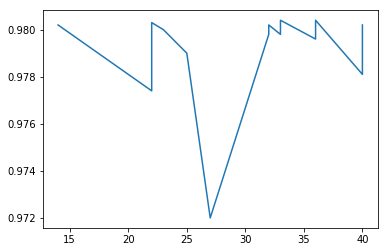

In [18]:
# ALGORITHM

CXPB, MUTPB, NGEN = 0.5, 0.2, 3

toolbox = base.Toolbox()

pop = None

for g in range(NGEN):
    # INITIALISATION
    
    print("\nGENERATION ", g, '\n')

#     toolbox.register("attribute", lambda : random.sample(range(1, 100), random.randint(1,MAX_IND_SIZE)))
    toolbox.register("individual", tools.initIterate, creator.Individual,
                     lambda : random_subset(size=random.randint(1, 41)))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", mutate)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate)
   
    # ALGORITHM
    
    if not pop:
        pop = toolbox.population(n=41)
    pop_lengths = [len(p) for p in pop]
    print("    Population: ", pop_lengths)
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit


    # Select the next generation individuals
    offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # The population is entirely replaced by the offspring
    pop[:] = offspring
    
    
    # Unregistering tools
    toolbox.unregister("individual")
    toolbox.unregister("population")
    toolbox.unregister("mate")
    toolbox.unregister("mutate")
    toolbox.unregister("select")
    toolbox.unregister("evaluate")
    
    pop_l, fits = zip(*sorted(zip(pop_lengths, fitnesses)))
    plt.plot(pop_l, fits)
    plt.show()
    


In [19]:
pop


[['dst_host_srv_diff_host_rate',
  'logged_in',
  'num_failed_logins',
  'num_file_creations',
  'urgent',
  'num_root',
  'num_outbound_cmds',
  'su_attempted',
  'rerror_rate',
  'dst_host_same_srv_rate',
  'src_bytes',
  'srv_serror_rate',
  'dst_host_serror_rate',
  'dst_host_srv_count',
  'duration',
  'count',
  'srv_diff_host_rate',
  'diff_srv_rate',
  'dst_host_srv_rerror_rate',
  'wrong_fragment',
  'num_compromised',
  'flag',
  'is_host_login',
  'dst_host_same_src_port_rate',
  'srv_rerror_rate',
  'protocol_type',
  'serror_rate',
  'dst_host_count',
  'dst_host_srv_serror_rate',
  'dst_host_diff_srv_rate',
  'srv_count',
  'num_access_files',
  'root_shell',
  'land',
  'dst_bytes',
  'same_srv_rate'],
 ['dst_host_srv_diff_host_rate',
  'logged_in',
  'num_failed_logins',
  'num_file_creations',
  'urgent',
  'num_root',
  'num_outbound_cmds',
  'su_attempted',
  'rerror_rate',
  'dst_host_same_srv_rate',
  'src_bytes',
  'srv_serror_rate',
  'dst_host_serror_rate',
  'd